In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
from scipy.integrate import cumulative_simpson as cumsimp
from scipy.linalg import cholesky, solve_triangular



In [4]:
import dickandballs as db

In [5]:
some_kernel = db.Kernel('SE', sigma=1,l=1)

kernel code works with unequal length arrays

In [38]:
x2 = np.linspace(0, 50, 4)
x1 = np.array([1,40])
f1 = np.array([0.033545,1/3])

In [39]:
sigma = 1
l = 1
r = np.subtract.outer(x1, x2)
K = sigma ** 2 * np.exp(-r / (2 * l ** 2))

In [40]:
my_kernel = db.Kernel('SE', sigma=sigma, l=l)

In [76]:
def fit(x1, x2, f, kernel):

    kernel = kernel
    K_11 = kernel.compute(x1)
    K_12 = kernel.compute(x1, x2)
    K_22 = kernel.compute(x2)

    L = cholesky(K_11, lower=True)
    y = solve_triangular(L, f, lower=True)
    alpha = solve_triangular(L.T, y, lower=False)
    mean_star = K_12.T @ alpha

    v = solve_triangular(L, K_12, lower=True)
    cov_star = K_22 - (v.T @ v)

    bruh = v.T@v
    print(np.linalg.eigvals(bruh))
    np.linalg.cholesky(bruh)

    return mean_star, cov_star

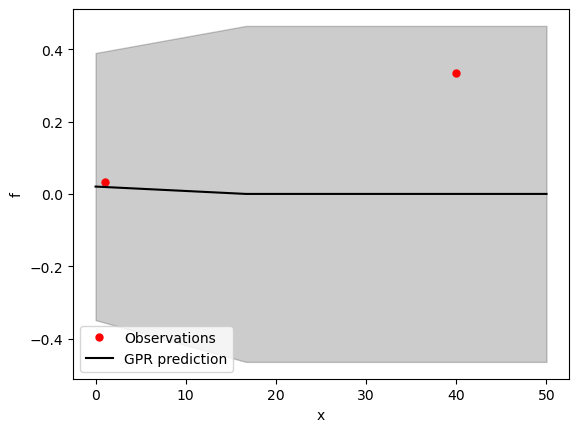

In [77]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# the squared exponential kernel is RBF kernel
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

gpr = GaussianProcessRegressor(kernel=kernel)
# fit the model to the residuals
gpr.fit(x1.reshape(-1, 1), f1.reshape(-1, 1))

f2, sigma = gpr.predict(x2.reshape(-1,1), return_std=True)

# add the polynomial to the GPR predictions

plt.figure()
plt.plot(x1, f1, 'r.', markersize=10, label='Observations')
plt.plot(x2, f2, '-', color='black', label='GPR prediction')
plt.fill_between(x2.ravel(), f2 - 1.96 * sigma, f2 + 1.96 * sigma, alpha=0.2, color='k')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.show()

In [78]:
mean_star, cov_star = fit(x1, x2, f1, my_kernel)

[ 0.00000000e+00+0.j          1.90734668e+21+0.j
 -1.39254679e-02+0.00303611j -1.39254679e-02-0.00303611j]


LinAlgError: Matrix is not positive definite

In [43]:
kern_x2= my_kernel.compute(x2)

In [44]:
f2 = np.random.multivariate_normal(mean_star, cov_star)
sigma2 = np.sqrt(np.diag(cov_star))

/tmp/ipykernel_73509/3534796776.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  f2 = np.random.multivariate_normal(mean_star, cov_star)
/tmp/ipykernel_73509/3534796776.py:2: RuntimeWarning: invalid value encountered in sqrt
  sigma2 = np.sqrt(np.diag(cov_star))


<Axes: >

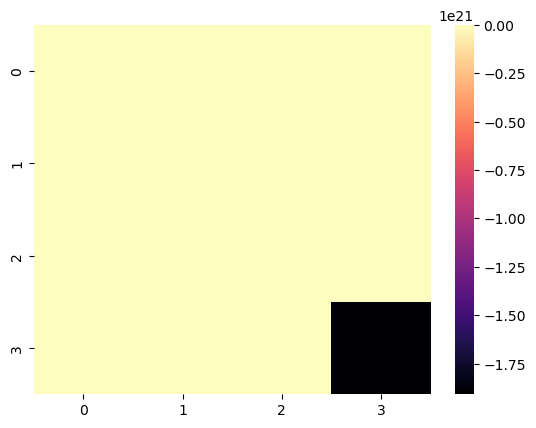

In [45]:
sns.heatmap(cov_star, cmap='magma')

In [46]:
f2

array([-8.07461088e-01, -3.35927185e+03, -1.39754506e+07, -5.81415345e+10])

In [47]:
sigma2

array([0.7950601,       nan,       nan,       nan])

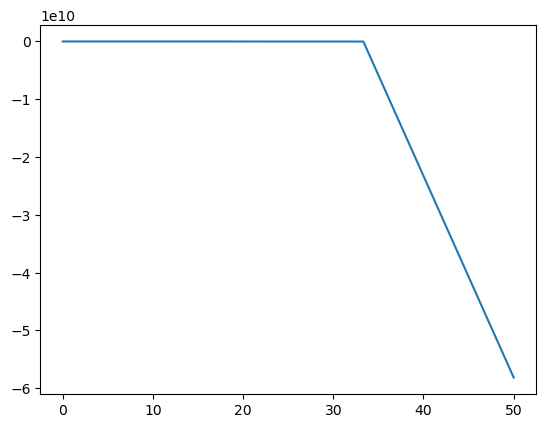

In [48]:
plt.plot(x2, f2)
plt.fill_between(x2, f2 - sigma2, f2 + sigma2, color='gray', alpha=0.2, label='Error')
